In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_d=pd.read_csv(r'C:\Users\happy\Data Science & AI\Data Files\visadataset.csv')
visa_df=pd.DataFrame(visa_d)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [13]:
cat = visa_df.select_dtypes(include='object').columns
num = visa_df.select_dtypes(exclude='object').columns

In [33]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [23]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [19]:
visa_df['continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

**Unique**

In [26]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [28]:
len(visa_df['continent'].unique())

6

**Nunique**

In [35]:
visa_df['continent'].nunique()

6

**Frequency Tables**
- continent column has some unique continent names are available
- total data size 25480 observations
- will create a table having continents and number of applicants from each continent

In [52]:
# step-1: total data                             {visa_df}
# step-2: Select particular column               {visa_df['continent']
# step-3: equating a specific label              {visa_df['continent'] == 'Asia'
# step-4: Pass the True condition to entire DataFrame
con = visa_df['continent'] =='Asia'
visa_df[con]
len(visa_df[con])

16861

In [60]:
no_of_applications=[]
labels = visa_df['continent'].unique()
for i in labels:
    con = visa_df['continent'] == i
    count = len(visa_df[con])
    no_of_applications.append(count)

In [62]:
no_of_applications

[16861, 551, 3292, 3732, 852, 192]

In [64]:
labels

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [74]:
continent_df = pd.DataFrame(zip(labels,no_of_applications),
             columns=['Continent', 'No applicants'])
continent_df.to_csv('continent_df.csv', index=False)
continent_df

,Continent,No applicants
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


In [80]:
count = [] #change-1
for col in cat[1:]:
    labels = visa_df[col].unique()
    for label in labels:
        con = visa_df[col] == label
        count.append(len(visa_df[con]))
    df = pd.DataFrame(zip(labels,count),columns=['Column','Count'])
    df.to_csv(f'{col}_df.csv',index=False)

**Value_counts**

In [11]:
continent_vc = visa_df['continent'].value_counts()
continent_vc

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [13]:
keys = continent_vc.keys()

In [15]:
values = continent_vc.values

In [19]:
continent_df = pd.DataFrame(zip(keys,values), 
                            columns = ['Continent', 'Number of applicants'])

In [29]:
for i in cat[1:]:
    vc = visa_df[i].value_counts()
    keys = vc.keys()
    vaues = vc.values
    vc_df = pd.DataFrame(zip(keys,values), columns=['Labels','Counts'])
    vc_df.to_csv(f'{i}.csv', index = False)

- Step-1:- Create a folder i.e freq_table
- Step-2:- New directory = Python locaion + Folder name
- Step-3:- New directory + colname.csv

**Step-1:- Create a Folder**

In [40]:
import os
folder_name = 'freq_tables'
try:
    os.makedirs(folder_name)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'freq_tables'


**Step-2:- New Directory**

In [49]:
cwd = os.getcwd()
nwd = os.path.join(cwd,folder_name)
nwd

'C:\\Users\\happy\\Data Science & AI\\Data Analaysis\\EDA\\freq_tables'

**Step-3:- Full paths**

In [52]:
for i in cat[1:]:
    file_name = f'{i}_df.csv'
    path = os.path.join(nwd, file_name)
    print(path)

C:\Users\happy\Data Science & AI\Data Analaysis\EDA\freq_tables\continent_df.csv
C:\Users\happy\Data Science & AI\Data Analaysis\EDA\freq_tables\education_of_employee_df.csv
C:\Users\happy\Data Science & AI\Data Analaysis\EDA\freq_tables\has_job_experience_df.csv
C:\Users\happy\Data Science & AI\Data Analaysis\EDA\freq_tables\requires_job_training_df.csv
C:\Users\happy\Data Science & AI\Data Analaysis\EDA\freq_tables\region_of_employment_df.csv
C:\Users\happy\Data Science & AI\Data Analaysis\EDA\freq_tables\unit_of_wage_df.csv
C:\Users\happy\Data Science & AI\Data Analaysis\EDA\freq_tables\full_time_position_df.csv
C:\Users\happy\Data Science & AI\Data Analaysis\EDA\freq_tables\case_status_df.csv


In [54]:
import os
folder_name = 'freq_tables'
try:
    os.makedirs(folder_name)
except Exception as e:
    print(e)
##########################################
cwd = os.getcwd()
nwd = os.path.join(cwd,folder_name)
##########################################
for i in cat[1:]:
    vc = visa_df[i].value_counts()
    keys = vc.keys()
    values = vc.values
    vc_df = pd.DataFrame(zip(keys,values),columns = ['Lables', 'Count'])
    file_name = f'{i}_df.csv'
    path = os.path.join(nwd,file_name)
    vc_df.to_csv(path,index = False)

[WinError 183] Cannot create a file when that file already exists: 'freq_tables'


**groupby**
- In Sql we have groupby option
- Similarly, In python also we have groupby
- First it will group the similar lables together
- On that we can perform any math operations

In [61]:
visa_df.groupby('continent')

In [63]:
list(visa_df.groupby('continent'))

[('Africa',
           case_id continent education_of_employee has_job_experience  \
  4         EZYV05    Africa              Master's                  Y   
  18        EZYV19    Africa              Master's                  Y   
  74        EZYV75    Africa              Master's                  Y   
  194      EZYV195    Africa              Master's                  Y   
  242      EZYV243    Africa            Bachelor's                  N   
  ...          ...       ...                   ...                ...   
  25385  EZYV25386    Africa             Doctorate                  Y   
  25408  EZYV25409    Africa              Master's                  Y   
  25443  EZYV25444    Africa            Bachelor's                  N   
  25446  EZYV25447    Africa              Master's                  N   
  25474  EZYV25475    Africa             Doctorate                  N   
  
        requires_job_training  no_of_employees  yr_of_estab  \
  4                         N             1082

In [65]:
visa_df.groupby('continent').size()

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
dtype: int64

In [67]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

**Bar Charts**
- bar charts under the matplotlib
- plt.bar
- bar chart needs class names and class frequency
- class names we can get from value counts
- class frequency we can get from value counts

In [23]:
keys = visa_df['continent'].value_counts().keys()
values = visa_df['continent'].value_counts().values

<BarContainer object of 6 artists>

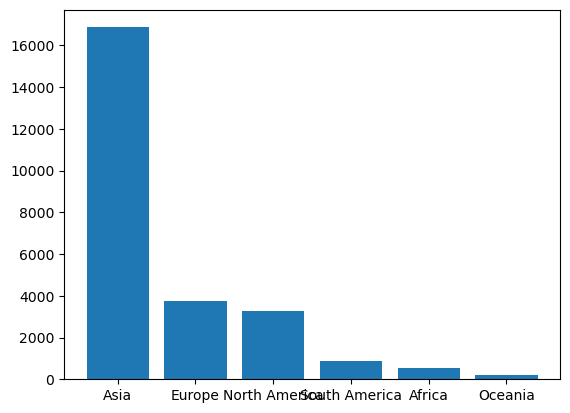

In [25]:
plt.bar(keys,values)